In [27]:
import numpy as np
import pandas as pd
import seaborn as sns 
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM 
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
df = pd.read_csv('ASII_stock_combined.csv')
df['timestamp'] = pd.to_datetime(df['timestamp']) 
df = df.set_index('timestamp')
print(f"Jumlah Baris = {df.shape[0]}")
df.head()

Jumlah Baris = 1374


,open,low,high,close,volume
timestamp,,,,,
2019-01-01,8225,8225,8225,8225,0
2019-01-02,8200,8125,8275,8200,14014100
2019-01-03,8100,8100,8400,8375,25148400
2019-01-04,8400,8200,8450,8350,32475900
2019-01-07,8450,8150,8475,8150,32649700


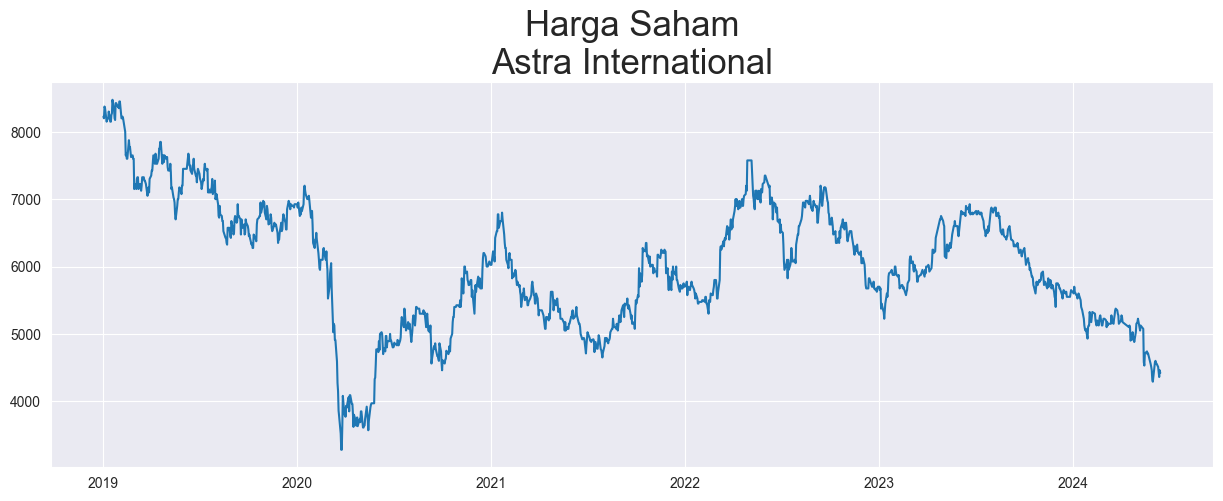

In [29]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
plt.plot(df.index, df['close'])
plt.title("Harga Saham\nAstra International", fontsize=25)
plt.show()

In [30]:
ms = MinMaxScaler()
df['close'] = ms.fit_transform(df[['close']])

In [31]:
def split_data(df, train_size): 
    size = int(len(df) * train_size)
    train, test = df.iloc[0:size], df.iloc[size:len(df)]
    return train, test

In [32]:
train, test = split_data(df['close'], 0.8)

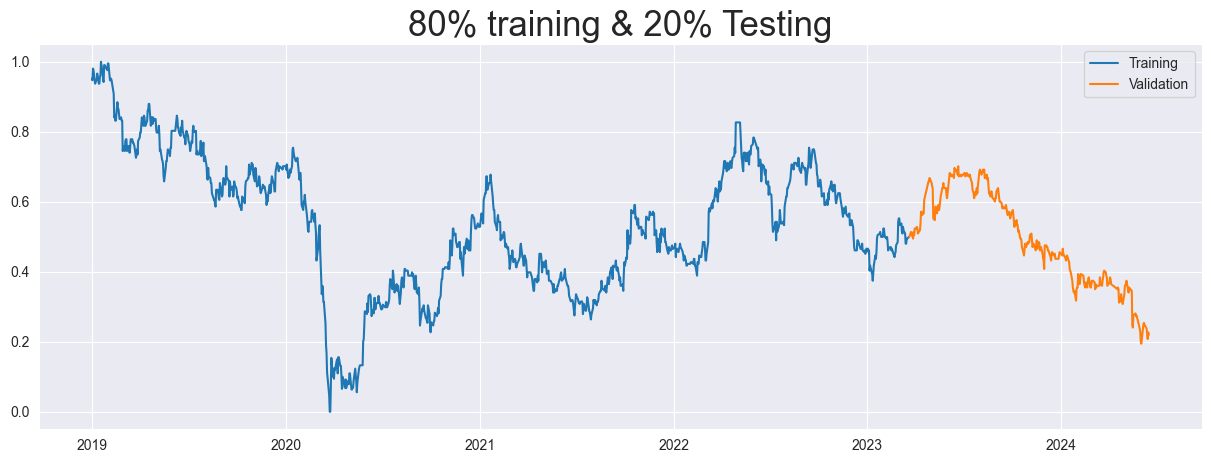

In [33]:
train, test = split_data(df['close'], 0.8) #80% Train
plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot(test)
plt.legend(labels=['Training', 'Validation'])
plt.title('80% training & 20% Testing', fontsize=25)
plt.show()

In [34]:
def split_target(df, look_back=1):
    X, y = [], []
    for i in range(len(df) - look_back):
        a = df[i:(i + look_back), 0]
        X.append(a)
        y.append(df[i + look_back, 0])
    return np.array(X), np.array(y)

In [35]:
X_train, y_train = split_target(train.values.reshape(len(train), 1))
X_test, y_test = split_target(test.values.reshape(len(test), 1))

In [36]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))

In [37]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred_lr = model_lr.predict(X_test)

In [39]:
y_test_inv = ms.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = ms.inverse_transform(y_pred_lr.reshape(-1, 1))

In [40]:
# Calculate metrics
mae_lr = mean_absolute_error(y_test_inv, y_pred_inv)
mse_lr = mean_squared_error(y_test_inv, y_pred_inv)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_inv, y_pred_inv)

In [41]:
# Print results
print(f'MAE: {mae_lr}')
print(f'MSE: {mse_lr}')
print(f'RMSE: {rmse_lr}')
print(f'R2 Score: {r2_lr}')

MAE: 66.81013404422421
MSE: 8931.658278123075
RMSE: 94.50745091326438
R2 Score: 0.9813785083677172


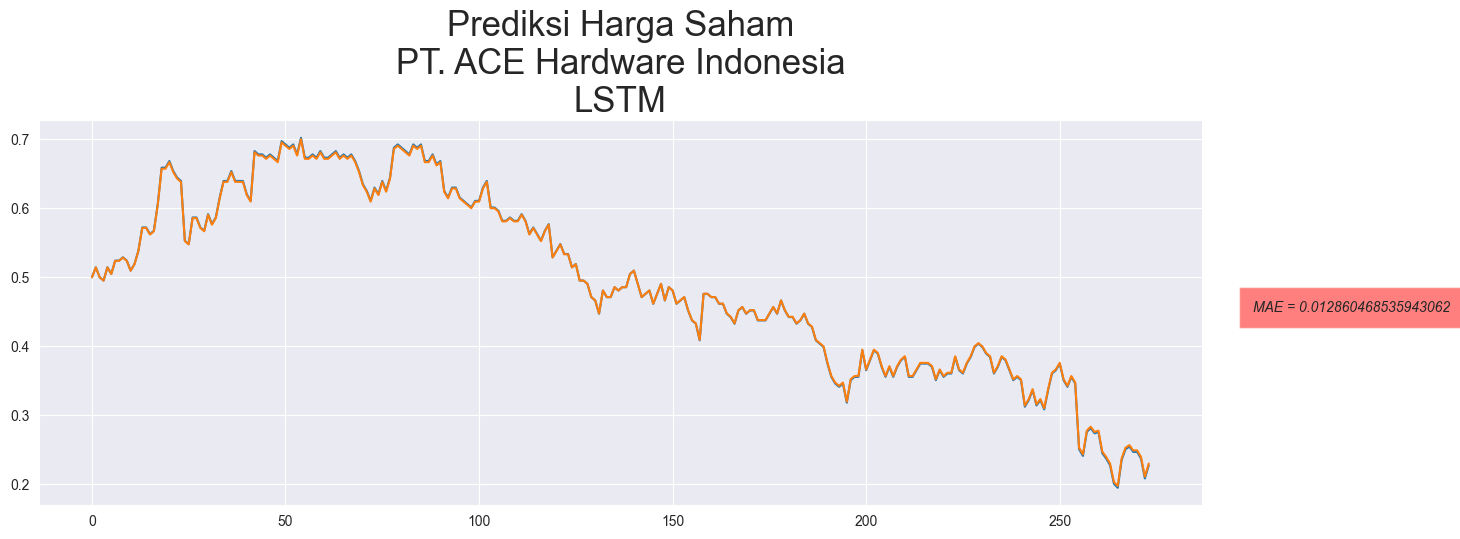

In [42]:
plt.figure(figsize=(15,5))
y_pred = model_lr.predict(X_test)
y_pred = list(np.reshape(y_pred, (1,len(y_pred)))[0])

X_test = np.reshape(X_test, (len(X_test),1))
X_test = list(np.reshape(X_test, (1,len(X_test)))[0])

plt.plot(X_test)
plt.plot(y_pred)
plt.text(300, 0.45, f"MAE = {mean_absolute_error(y_test, y_pred)}", style='italic', bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.title('Prediksi Harga Saham\nPT. ACE Hardware Indonesia\nLSTM', fontsize=25)
plt.show()